# Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We initialize the features and targets of $D_1$ as described on the exercise sheet.

In [2]:
D_1_x = np.random.normal(1, 0.05, size=(100, 1))
D_1_y = (1.3 * D_1_x ** 2 + 4.8 * D_1_x + 8 + np.random.randn(100, 1))

We initialize $D_1$ from the csv and normalize it using `sklearn.preprocessing.MinMaxScaler` (since we are finally allowed to use sklearn). No more pre-processing is needed, since all values are numeric and there are no NaNs.

In [3]:
from sklearn.preprocessing import MinMaxScaler

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

D_2_y = wine_data['quality'].to_numpy().reshape(-1, 1)
D_2_X = wine_data.drop('quality', axis=1).to_numpy()

scaler_X = MinMaxScaler()
D_2_X = scaler_X.fit_transform(D_2_X)

scaler_y = MinMaxScaler()
D_2_y = scaler_y.fit_transform(D_2_y)

# GLMs: Generalized Linear Models with Scikit-Learn

## Splitting the Data

We use `sklearn.model_selection.train_test_split` for splitting the $D_2$ in 80% training data and 20% test data.

In [4]:
from sklearn.model_selection import train_test_split

D_2_X_train, D_2_X_test, D_2_y_train, D_2_y_test = train_test_split(D_2_X, D_2_y, test_size=0.2, random_state=69)

## Hyperparameters and Learning

In [5]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Ordinary Least Squares

Ordinary Least Squares regression does not have hyperparameters. Therefore, it does not make sense to plot the RMSE values. Instead, we just print them.

In [6]:
from sklearn.linear_model import LinearRegression


def train_plot_OLS():
    OLS = LinearRegression()

    OLS.fit(D_2_X_train, D_2_y_train)

    pred_train = OLS.predict(D_2_X_train)
    pred_test = OLS.predict(D_2_X_test)

    rmse_train = rmse(D_2_y_train, pred_train)
    rmse_test = rmse(D_2_y_test, pred_test)

    relative_diff = (rmse_test - rmse_train) / rmse_train

    print(f'OLS Train RMSE: {rmse_train:.4f}')
    print(f'OLS Test RMSE: {rmse_test:.4f}')
    print(f'Relative Difference RMSE: {relative_diff:.2%}')


train_plot_OLS()

OLS Train RMSE: 0.1271
OLS Test RMSE: 0.1371
Relative Difference RMSE: 7.86%


### Ridge Regression

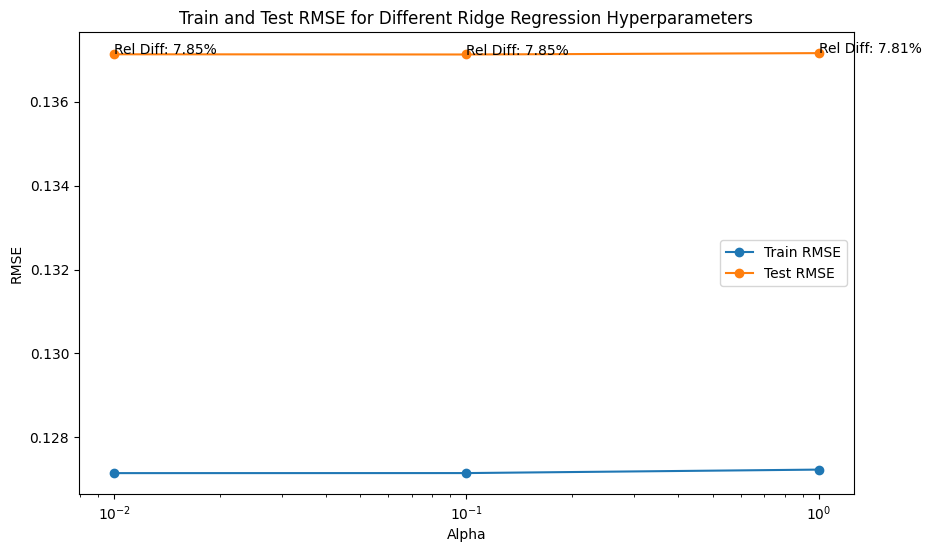

In [7]:
from sklearn.linear_model import Ridge


def train_plot_Ridge():
    hyperparameters = [
        {'alpha': 0.01},
        {'alpha': 0.1},
        {'alpha': 1},
    ]
    # We use 'alpha' as hyperparameter, wich is the regulation constant for the L2 penalty term of Ridge

    train_rmse_history = []
    test_rmse_history = []
    relative_diff_history = []

    for params in hyperparameters:
        ridge = Ridge(alpha=params['alpha'])

        ridge.fit(D_2_X_train, D_2_y_train)

        pred_train = ridge.predict(D_2_X_train)
        pred_test = ridge.predict(D_2_X_test)

        train_rmse = rmse(D_2_y_train, pred_train)
        test_rmse = rmse(D_2_y_test, pred_test)

        train_rmse_history.append(train_rmse)
        test_rmse_history.append(test_rmse)

        relative_diff = (test_rmse - train_rmse) / train_rmse
        relative_diff_history.append(relative_diff)

    alphas = [params['alpha'] for params in hyperparameters]
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_rmse_history, label='Train RMSE', marker='o')
    plt.plot(alphas, test_rmse_history, label='Test RMSE', marker='o')

    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for Different Ridge Regression Hyperparameters')

    for i, alpha in enumerate(alphas):
        plt.text(alpha, test_rmse_history[i], f'Rel Diff: {relative_diff_history[i]:.2%}')

    plt.legend()
    plt.show()


train_plot_Ridge()


We can see that neither alpha nor solver have a meaningful impact on the performance of the model.

There's a consistent difference between Train and Test RMSE, with Test being worse overall. Interestingly, the regularization strength (alpha) doesn’t seem to significantly impact this gap. The values are almost exactly the same as in the OLS model without regularization, suggesting that the dataset is not complex enough to benefit from regularization.

### LASSO

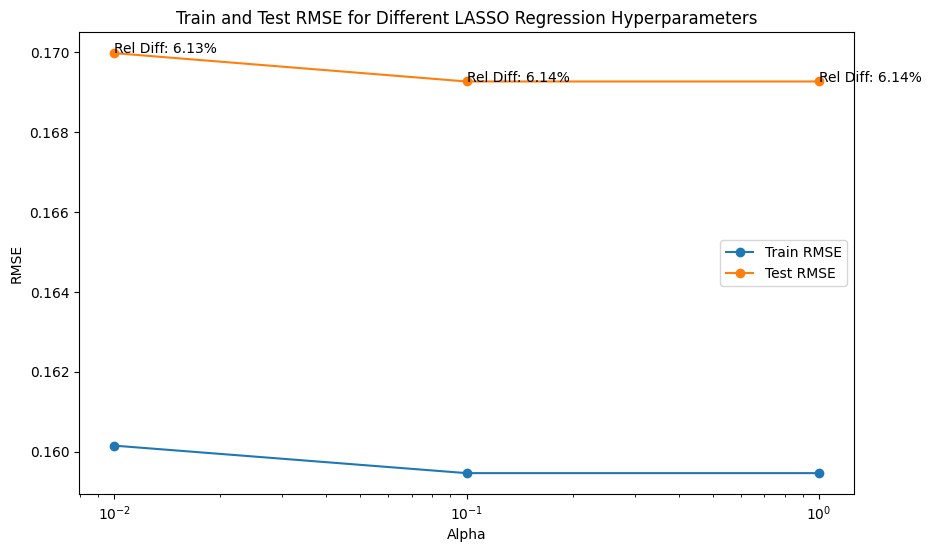

In [8]:
from sklearn.linear_model import Lasso


def train_plot_LASSO():
    hyperparameters = [
        {'alpha': 0.01},
        {'alpha': 0.1},
        {'alpha': 1},
    ]
    # We use 'alpha' as hyperparameter, wich is the regulation constant for the L1 penalty term of LASSO

    train_rmse_history = []
    test_rmse_history = []
    relative_diff_history = []

    for params in hyperparameters:
        lasso = Lasso(alpha=params['alpha'])
        lasso.fit(D_2_X_train, D_2_y_train.ravel())

        pred_train = lasso.predict(D_2_X_train)
        pred_test = lasso.predict(D_2_X_test)

        train_rmse = rmse(D_2_y_train, pred_train)
        test_rmse = rmse(D_2_y_test, pred_test)

        train_rmse_history.append(train_rmse)
        test_rmse_history.append(test_rmse)

        relative_diff = (test_rmse - train_rmse) / train_rmse
        relative_diff_history.append(relative_diff)

    alphas = [params['alpha'] for params in hyperparameters]
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_rmse_history, label='Train RMSE', marker='o')
    plt.plot(alphas, test_rmse_history, label='Test RMSE', marker='o')

    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for Different LASSO Regression Hyperparameters')

    for i, alpha in enumerate(alphas):
        plt.text(alpha, test_rmse_history[i], f'Rel Diff: {relative_diff_history[i]:.2%}')

    plt.legend()
    plt.show()


train_plot_LASSO()

The model is slightly benefitting from regularization. Surprisingly both in training and test RMSE. The relative difference between train and test RMSE remains consistent. This suggests that the model is not overfitting but rather achieving a better fit overall.

### Stochastic Gradient Descent

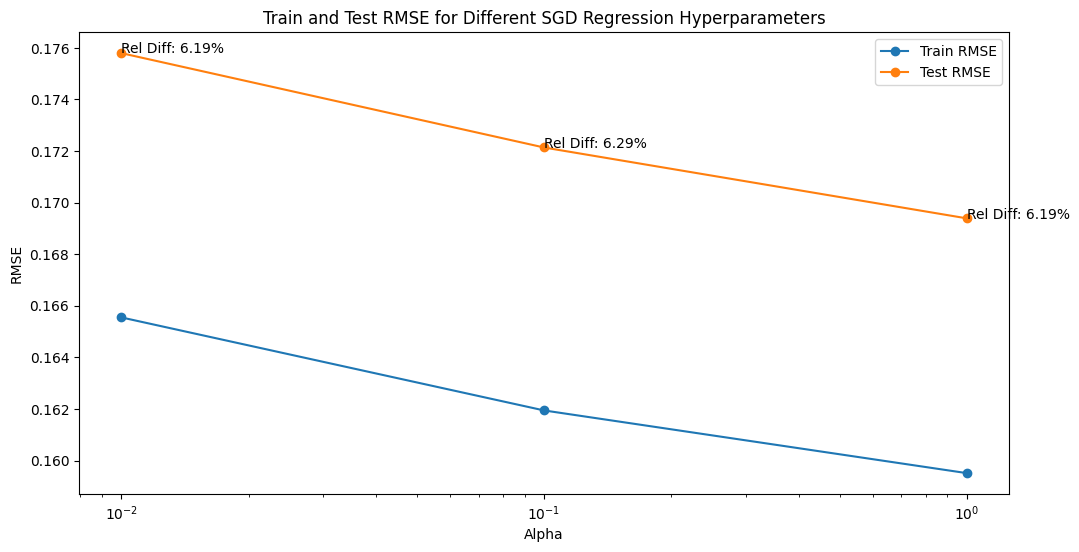

In [9]:
from sklearn.linear_model import SGDRegressor


def train_plot_SGD():
    hyperparameters = [
        {'alpha': 0.01},
        {'alpha': 0.1},
        {'alpha': 1},
    ]
    # We use 'alpha' as hyperparameter, wich is the regulation constant for the penalty term of SGD

    train_rmse_history = []
    test_rmse_history = []
    relative_diff_history = []

    for params in hyperparameters:
        sgd = SGDRegressor(alpha=params['alpha'])
        sgd.fit(D_2_X_train, D_2_y_train.ravel())

        pred_train = sgd.predict(D_2_X_train)
        pred_test = sgd.predict(D_2_X_test)

        train_rmse = rmse(D_2_y_train, pred_train)
        test_rmse = rmse(D_2_y_test, pred_test)

        train_rmse_history.append(train_rmse)
        test_rmse_history.append(test_rmse)

        relative_diff = (test_rmse - train_rmse) / train_rmse
        relative_diff_history.append(relative_diff)

    alphas = [params['alpha'] for params in hyperparameters]

    plt.figure(figsize=(12, 6))
    plt.plot(alphas, train_rmse_history, label='Train RMSE', marker='o')
    plt.plot(alphas, test_rmse_history, label='Test RMSE', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for Different SGD Regression Hyperparameters')

    for i, alpha in enumerate(alphas):
        plt.text(alpha, test_rmse_history[i], f'Rel Diff: {relative_diff_history[i]:.2%}')

    plt.legend()
    plt.show()


train_plot_SGD()

The model is again slightly benefitting from regularization, seen in a decrease in both training and test RMSE as alpha increases. Notably, the relative difference between the train and test RMSE stays roughly the same, indicating that the improvements in both sets are balanced.

There are no signs of overfitting, as the difference between the training and test RMSE remains consistent.

## Hyperparameter Tuning and Cross-Validation

### Ridge

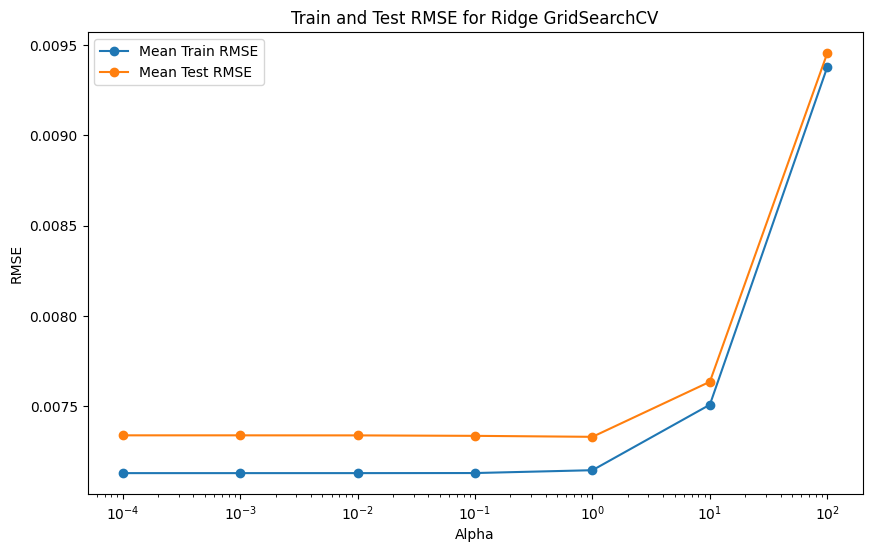

Best alpha: 1
Best cross-validated RMSE: 0.0856


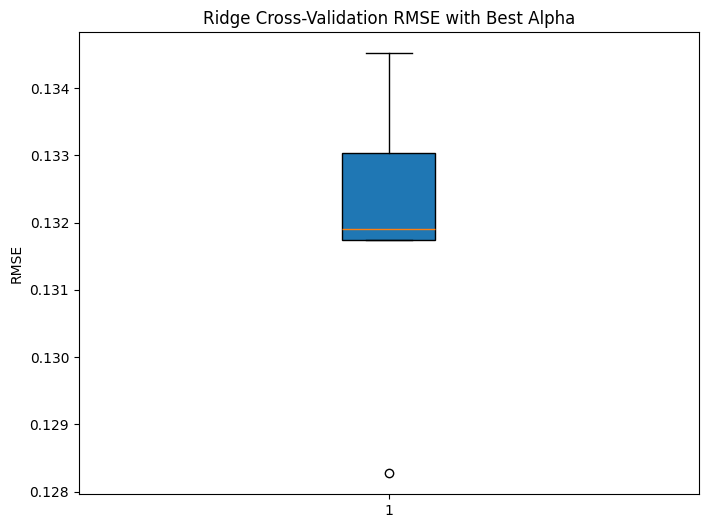

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


def tune_validate_ridge():
    hyperparams = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

    ridge = Ridge()

    grid_search = GridSearchCV(estimator=ridge, param_grid=hyperparams, cv=5, scoring='neg_mean_squared_log_error',
                               return_train_score=True)
    grid_search.fit(D_2_X_train, D_2_y_train.ravel())

    results = grid_search.cv_results_

    alphas = hyperparams['alpha']
    mean_train_scores = results['mean_train_score']
    mean_test_scores = results['mean_test_score']

    plt.figure(figsize=(10, 6))
    plt.plot(alphas, -mean_train_scores, label='Mean Train RMSE', marker='o')
    plt.plot(alphas, -mean_test_scores, label='Mean Test RMSE', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for Ridge GridSearchCV')
    plt.legend()
    plt.show()

    best_alpha = grid_search.best_params_['alpha']
    best_score = -grid_search.best_score_
    print(f'Best alpha: {best_alpha}')
    print(f'Best cross-validated RMSE: {np.sqrt(best_score):.4f}')

    best_ridge = Ridge(alpha=best_alpha)
    cross_val_scores = cross_val_score(best_ridge, D_2_X, D_2_y.ravel(), cv=5, scoring='neg_mean_squared_error')
    cross_val_rmse = np.sqrt(-cross_val_scores)

    plt.figure(figsize=(8, 6))
    plt.boxplot(cross_val_rmse, vert=True, patch_artist=True)
    plt.title('Ridge Cross-Validation RMSE with Best Alpha')
    plt.ylabel('RMSE')
    plt.show()


tune_validate_ridge()

The optimal alpha value is 1, showing a moderate level of regularization. This helps prevent overfitting and underfitting. The boxplot of the cross-validation scores shows a low variance in RMSE, which means that Ridge Regression performs consistently across different data splits and is less sensitive to variations, making it a reliable model for this dataset.

### LASSO

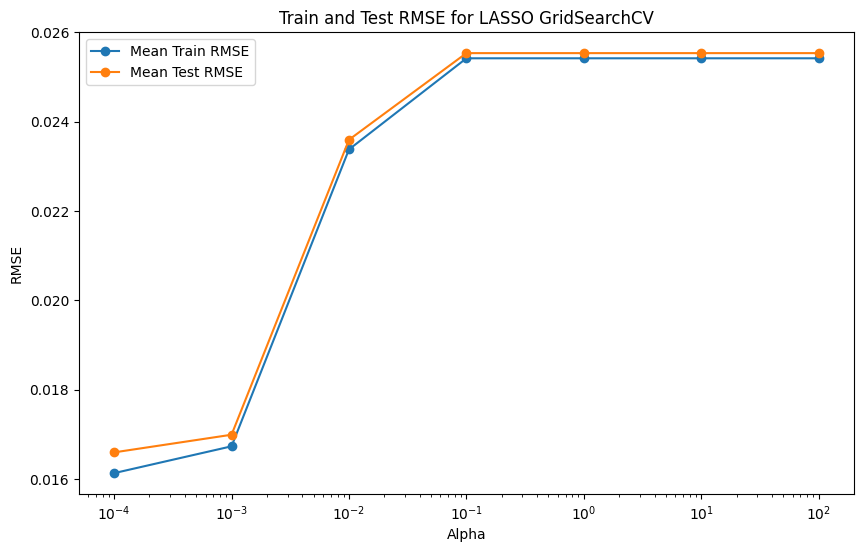

Best alpha: 0.0001
Best cross-validated RMSE: 0.1288


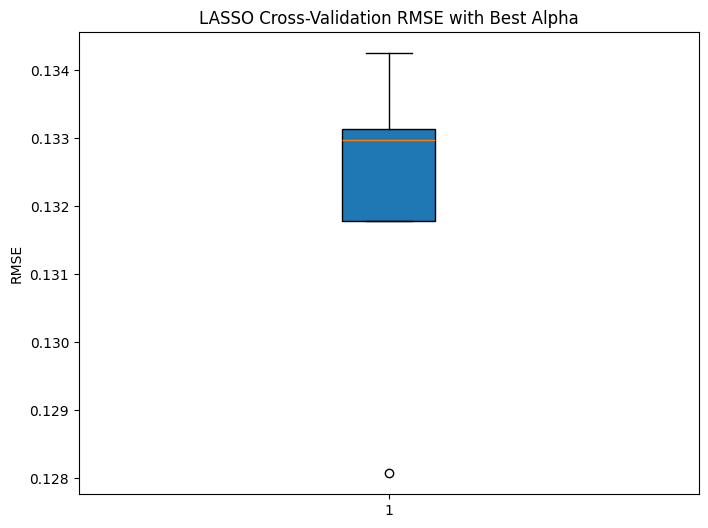

In [11]:
def tune_validate_lasso():
    hyperparams = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

    lasso = Lasso()

    grid_search = GridSearchCV(estimator=lasso, param_grid=hyperparams, cv=5, scoring='neg_mean_squared_error',
                               return_train_score=True)

    grid_search.fit(D_2_X_train, D_2_y_train.ravel())
    results = grid_search.cv_results_

    alphas = hyperparams['alpha']
    mean_train_scores = results['mean_train_score']
    mean_test_scores = results['mean_test_score']

    plt.figure(figsize=(10, 6))
    plt.plot(alphas, -mean_train_scores, label='Mean Train RMSE', marker='o')
    plt.plot(alphas, -mean_test_scores, label='Mean Test RMSE', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for LASSO GridSearchCV')
    plt.legend()
    plt.show()

    best_alpha = grid_search.best_params_['alpha']
    best_score = -grid_search.best_score_
    print(f'Best alpha: {best_alpha}')
    print(f'Best cross-validated RMSE: {np.sqrt(best_score):.4f}')

    best_lasso = Lasso(alpha=best_alpha)
    cross_val_scores = cross_val_score(best_lasso, D_2_X, D_2_y.ravel(), cv=5, scoring='neg_mean_squared_error')
    cross_val_rmse = np.sqrt(-cross_val_scores)

    plt.figure(figsize=(8, 6))
    plt.boxplot(cross_val_rmse, vert=True, patch_artist=True)
    plt.title('LASSO Cross-Validation RMSE with Best Alpha')
    plt.ylabel('RMSE')
    plt.show()


tune_validate_lasso()


The best alpha value is 0.0001, which suggests minimal regularization is sufficient. This is likely because the dataset lacks sparsity, meaning that LASSO's ability to drive coefficients to zero isn’t as beneficial here. The RMSE variance in the boxplot is almost the same as Ridge, indicating that LASSO is comparably consistent.

### SGD

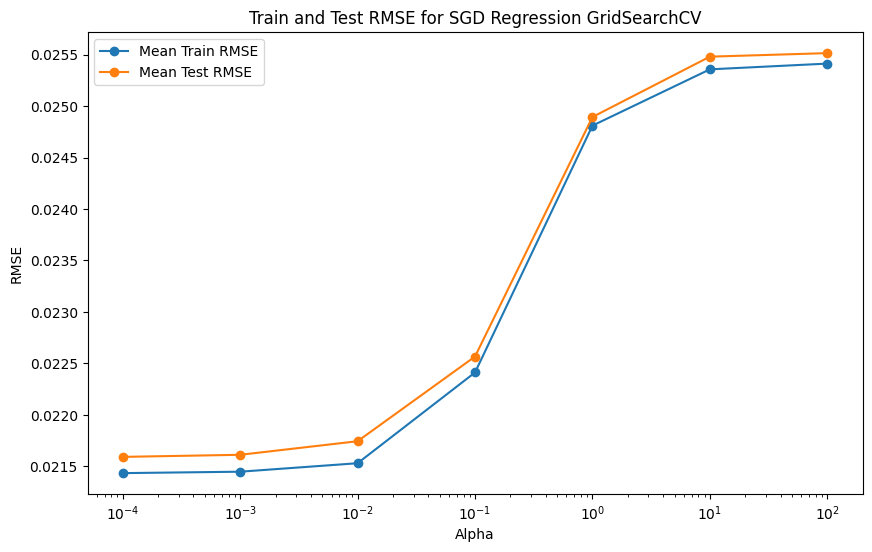

Best alpha: 0.0001
Best cross-validated RMSE: 0.1469


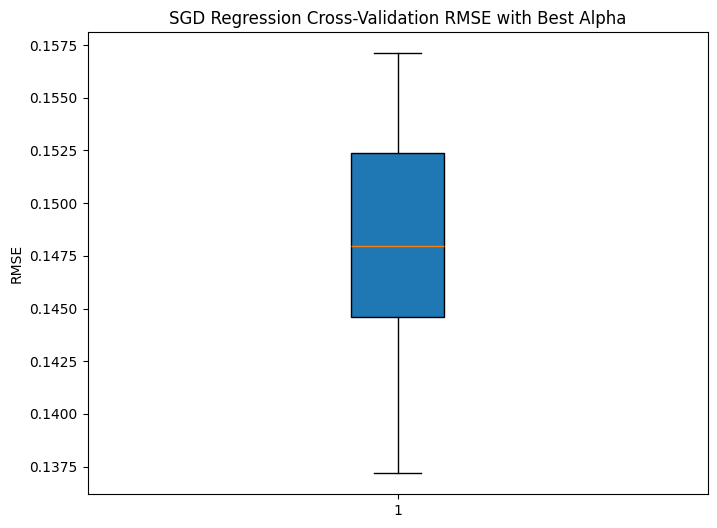

In [12]:
def tune_validate_sgd():
    hyperparams = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
    sgd = SGDRegressor()
    grid_search = GridSearchCV(estimator=sgd, param_grid=hyperparams, cv=5, scoring='neg_mean_squared_error',
                               return_train_score=True)

    grid_search.fit(D_2_X_train, D_2_y_train.ravel())
    results = grid_search.cv_results_

    alphas = hyperparams['alpha']
    mean_train_scores = results['mean_train_score']
    mean_test_scores = results['mean_test_score']

    plt.figure(figsize=(10, 6))
    plt.plot(alphas, -mean_train_scores, label='Mean Train RMSE', marker='o')
    plt.plot(alphas, -mean_test_scores, label='Mean Test RMSE', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for SGD Regression GridSearchCV')
    plt.legend()
    plt.show()

    best_alpha = grid_search.best_params_['alpha']
    best_score = -grid_search.best_score_

    print(f'Best alpha: {best_alpha}')
    print(f'Best cross-validated RMSE: {np.sqrt(best_score):.4f}')

    best_sgd = SGDRegressor(alpha=best_alpha)

    cross_val_scores = cross_val_score(best_sgd, D_2_X, D_2_y.ravel(), cv=5, scoring='neg_mean_squared_error')
    cross_val_rmse = np.sqrt(-cross_val_scores)

    plt.figure(figsize=(8, 6))
    plt.boxplot(cross_val_rmse, vert=True, patch_artist=True)
    plt.title('SGD Regression Cross-Validation RMSE with Best Alpha')
    plt.ylabel('RMSE')
    plt.show()


tune_validate_sgd()

The optimal alpha for Stochastic Gradient Descent was determined to be 0.001. This shows that a small amount of regularization is beneficial. The boxplot for cross-validation RMSE values shows a moderate amount of variance across different data splits. his makes SGD the least generalized model, with low significance in terms of stability compared to Ridge and LASSO.

# Polynomial Regression

## Prediction with High Degree Polynomials

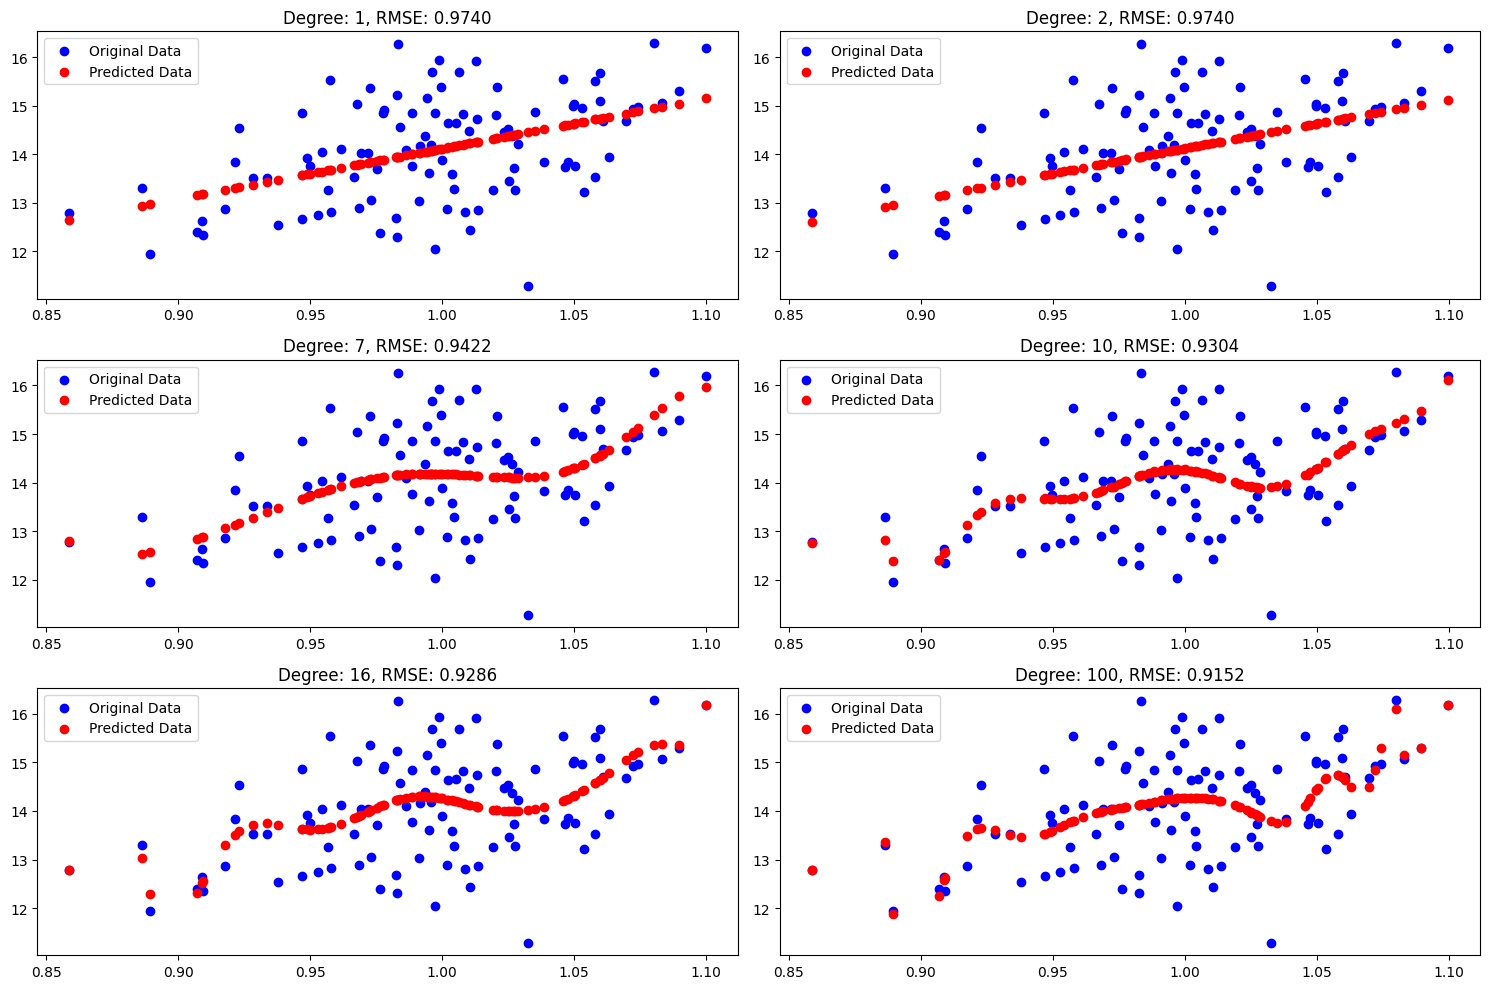

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


def high_degree_poly():
    degrees = [1, 2, 7, 10, 16, 100]

    plt.figure(figsize=(15, 10))
    for i, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree=degree)

        poly_X = poly.fit_transform(D_1_x)

        OLS = LinearRegression()
        OLS.fit(poly_X, D_1_y)

        pred = OLS.predict(poly_X)

        plt.subplot(3, 2, i + 1)

        plt.scatter(D_1_x, D_1_y, color='blue', label='Original Data')
        plt.scatter(D_1_x, pred, color='red', label=f'Predicted Data')

        rmse = np.sqrt(mean_squared_error(D_1_y, pred))
        plt.title(f'Degree: {degree}, RMSE: {rmse:.4f}')

        plt.legend()

    plt.tight_layout()
    plt.show()


high_degree_poly()

We clearly see the effect of reprocessing the data. For degree 1, it is a straight line, for degree 2, we see a parabel, and so on. For higher degrees, while the RMSE might decrease due to overfitting, the resulting model generalizes poorly to new data. This oscillatory behavior in higher-degree polynomials is characteristic of overfitting and could cause a Runge's effect when there is more data.


## Effect of Regularization

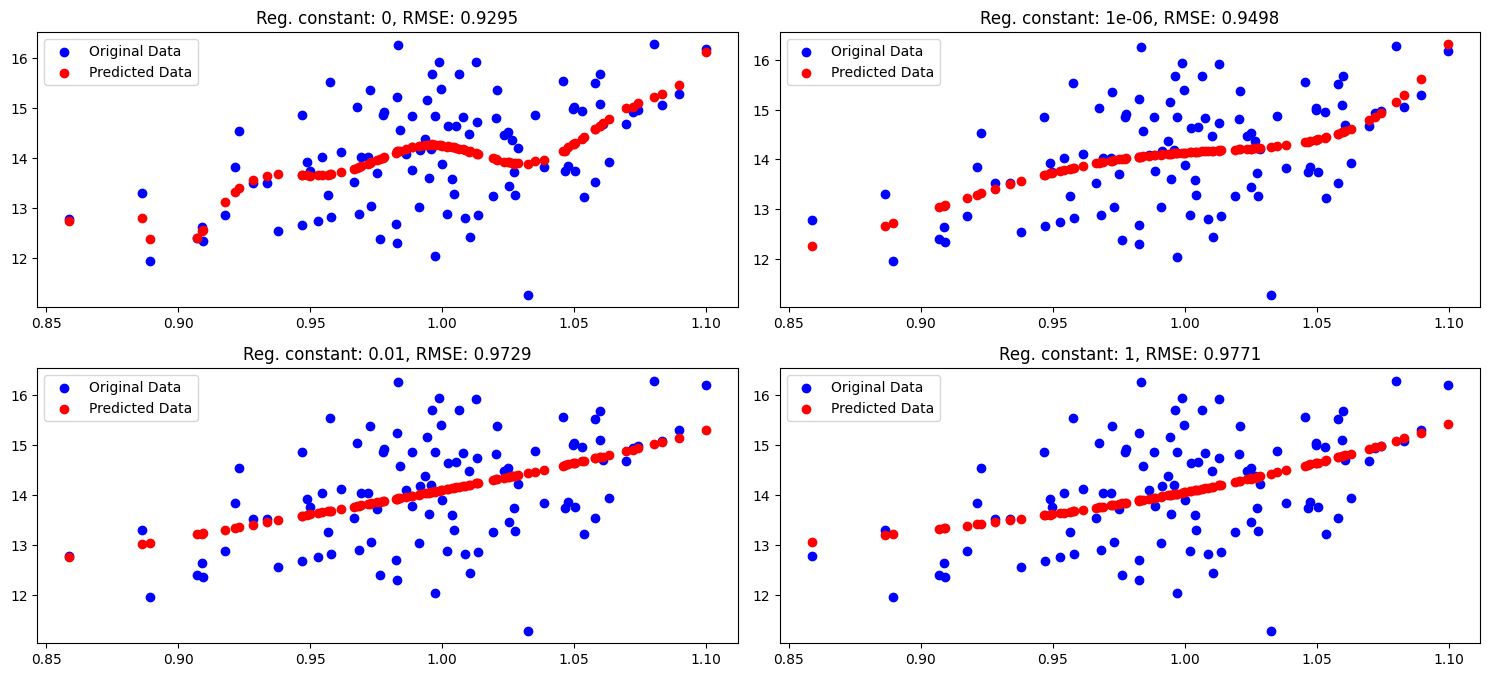

In [14]:
def poly_regulated():
    poly = PolynomialFeatures(degree=10)
    poly_X = poly.fit_transform(D_1_x)

    reg_consts = [0, 1e-6, 1e-2, 1]

    plt.figure(figsize=(15, 10))
    for i, reg_const in enumerate(reg_consts):
        ridge = Ridge(alpha=reg_const)
        ridge.fit(poly_X, D_1_y)
        pred = ridge.predict(poly_X)

        plt.subplot(3, 2, i + 1)
        plt.scatter(D_1_x, D_1_y, color='blue', label='Original Data')
        plt.scatter(D_1_x, pred, color='red', label=f'Predicted Data')

        rmse = np.sqrt(mean_squared_error(D_1_y, pred))
        plt.title(f'Reg. constant: {reg_const}, RMSE: {rmse:.4f}')

        plt.legend()

    plt.tight_layout()
    plt.show()


poly_regulated()

The larger the regularization constant, the more the predictions simplify toward the quadratic relationship similar to $y = 1.3x^2 + 4.8x + 8$, which should be the optimal fit. This demonstrates how regularization effectively curtails overfitting by penalizing overly complex models.